# 提升树（Boosted Trees）详解

**提升树（Boosted Trees）**是**Boosting**和**决策树**结合的一种强大机器学习方法。它通过将多个弱决策树按顺序组合成一个强学习器，显著提升预测性能。

最常见的提升树算法是**梯度提升树（Gradient Boosted Decision Trees, GBDT）**，也叫**GBM（Gradient Boosting Machine）**。

---

## 一、核心思想

- 每棵树依赖于前面所有树的残差
- 通过逐步拟合残差（负梯度），不断减小整体误差
- 所有树的预测结果按权重加和

提升树可用于**回归、分类和排序**。

---

## 二、数学原理

设有数据集：
$$
\{(x_i, y_i)\}_{i=1}^n
$$
目标是最小化损失函数：
$$
L = \sum_{i=1}^n \ell(y_i, F(x_i))
$$
其中：
- $F(x)$：模型的预测
- $\ell$：损失函数（如平方误差、对数损失）

**Boosting逐步构建模型：**
$$
F_0(x) = \arg\min_{\gamma} \sum_{i=1}^n \ell(y_i, \gamma)
$$

对于每一轮 $m=1,2,\dots,M$：
1. **计算负梯度（残差）：**
   $$
   r_i^{(m)} = -\left[\frac{\partial \ell(y_i, F(x_i))}{\partial F(x_i)}\right]_{F(x)=F_{m-1}(x)}
   $$
2. **拟合残差：**
   在$(x_i, r_i^{(m)})$上训练回归树$h_m(x)$
3. **更新模型：**
   $$
   F_m(x) = F_{m-1}(x) + \nu \cdot \gamma_m \cdot h_m(x)
   $$
   - $\gamma_m$：步长（可通过线搜索确定）
   - $\nu$：学习率（通常<0.1）

---

## 三、常用提升树框架

1. **Gradient Boosting（GBDT）**
   - scikit-learn原生实现
   - 支持自定义损失函数
2. **XGBoost**
   - 提供正则化
   - 稀疏特征支持好
   - 并行优化
3. **LightGBM**
   - 基于直方图的高效分裂
   - 支持大规模数据
4. **CatBoost**
   - 对类别特征原生支持

---

## 四、优缺点

✅ **优点：**
- 偏差低，性能强
- 能处理多种任务
- 可评估特征重要性
- 适应性强

❌ **缺点：**
- 训练慢（串行）
- 易过拟合（需调参）
- 对噪声敏感

---

## 五、与随机森林的对比

| 特性             | 随机森林             | 提升树（GBDT）           |
|------------------|-----------------------|--------------------------|
| 基学习器训练     | 并行独立             | 串行依赖                 |
| 目标             | 降低方差             | 降低偏差+方差            |
| 预测方式         | 平均或投票           | 加权和                   |
| 调参难度         | 中                   | 高                       |
| 性能             | 好                   | 更强                     |

---

## 六、Python示例：sklearn Gradient Boosting

```python
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 生成数据
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# GBDT模型
gbdt = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)
gbdt.fit(X_train, y_train)
y_pred = gbdt.predict(X_test)

print("GBDT Accuracy:", accuracy_score(y_test, y_pred))
```

---

## 七、调参要点

1. **n_estimators**
   - 树的数量
   - 越大越复杂
2. **learning_rate**
   - 步长
   - 越小越稳健
3. **max_depth**
   - 树的深度
   - 控制复杂度
4. **subsample**
   - 每轮使用部分样本
   - 提高泛化能力

> 通常先调`n_estimators`与`learning_rate`，再调`max_depth`。

---

## 八、总结

**提升树（Boosted Trees）**：
- 基于Boosting思想，通过多棵树串行拟合残差
- 训练慢，但预测性能极强
- 是目前最常用的高性能模型之一
- 推荐使用**XGBoost / LightGBM / CatBoost**等高效实现

---

In [30]:
from sklearn.tree import DecisionTreeRegressor
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt

In [31]:
def loaddata():
    data = np.loadtxt('data/data.txt',delimiter=',')
    n = data.shape[1]-1 #特征数
    X = data[:,0:n]
    y = data[:,-1].reshape(-1,1)
    return X,y

In [32]:
X,y = loaddata()

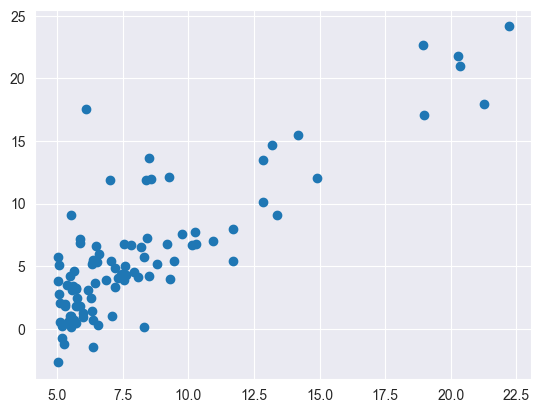

In [33]:
plt.scatter(X,y)

# 根据提升树算法原理手动实现
1、定义第一棵树，最大深度为5进行训练

In [34]:
tree_reg1 = DecisionTreeRegressor(max_depth=5)
tree_reg1.fit(X,y)

DecisionTreeRegressor(max_depth=5)

2、计算残差，并且将残差当作目标值训练第二棵树

In [35]:
y2 = y-tree_regl.predict(X).reshape(-1,1)
tree_reg2 = DecisionTreeRegressor(max_depth=5)
tree_reg2.fit(X,y2)

DecisionTreeRegressor(max_depth=5)

3、继续进行计算残差，并将残差当作目标值训练第三棵树

In [36]:
y3 = y2-tree_reg2.predict(X).reshape(-1,1)
tree_reg3 = DecisionTreeRegressor(max_depth=5)
tree_reg3.fit(X,y3)

DecisionTreeRegressor(max_depth=5)

4、测试

In [37]:
X_new = X[0:5,]
y_pred = sum(tree.predict(X_new) for tree in (tree_reg1, tree_reg2, tree_reg3))
print(y_pred)

[17.61560196  9.15380196 12.831       4.57199973  6.68971688]


# 使用sklearn

In [38]:
gbrt = GradientBoostingRegressor(max_depth=5, n_estimators=3,learning_rate=1.0)
gbrt.fit(X,y)
print(gbrt.predict(X_new))

[17.61560196  9.15380196 12.831       4.57199973  6.68971688]


/opt/homebrew/anaconda3/envs/pytorch2023/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
